In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
city_data = []

print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i %50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | tambura
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | flinders
Processing Record 10 of Set 1 | vao
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | robertson
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | catuday
Processing Record 21 of Set 1 | dunedin
Processing Record 22 of Set 1 | smithers
Proce

Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | maniitsoq
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | ginir
Processing Record 43 of Set 4 | grand gaube
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | tiarei
Processing Record 46 of Set 4 | high level
Processing Record 47 of Set 4 | shchelyayur
City not found. Skipping...
Processing Record 48 of Set 4 | belmonte
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | thinadhoo
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | san quintin
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 5 | bilma
Processing Record 8 of Set 5 | soligalich
Processing Record 9 of Set 5 | bababe
City not found. Skipping...
Processing Record 10 of Se

Processing Record 21 of Set 8 | axim
Processing Record 22 of Set 8 | pangnirtung
Processing Record 23 of Set 8 | puerto baquerizo moreno
Processing Record 24 of Set 8 | kiunga
Processing Record 25 of Set 8 | morondava
Processing Record 26 of Set 8 | torbay
Processing Record 27 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 28 of Set 8 | evensk
Processing Record 29 of Set 8 | alexander city
Processing Record 30 of Set 8 | guarapari
Processing Record 31 of Set 8 | port moresby
Processing Record 32 of Set 8 | san vicente
Processing Record 33 of Set 8 | itaquyry
Processing Record 34 of Set 8 | licata
Processing Record 35 of Set 8 | bonthe
Processing Record 36 of Set 8 | pimenta bueno
Processing Record 37 of Set 8 | skjervoy
Processing Record 38 of Set 8 | bandarbeyla
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | quepos
Processing Record 41 of Set 8 | saint-augustin
Processing Record 42 of Set 8 | kannur
Processing Record 43 of Set 8 | perui

Processing Record 12 of Set 12 | benxi
Processing Record 13 of Set 12 | superior
Processing Record 14 of Set 12 | gorin
Processing Record 15 of Set 12 | sibolga
Processing Record 16 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 17 of Set 12 | perpignan
Processing Record 18 of Set 12 | great falls
Processing Record 19 of Set 12 | bury saint edmunds
City not found. Skipping...
Processing Record 20 of Set 12 | khandyga
Processing Record 21 of Set 12 | pochutla
Processing Record 22 of Set 12 | sambava
Processing Record 23 of Set 12 | otradnoye
Processing Record 24 of Set 12 | yatou
Processing Record 25 of Set 12 | turayf
Processing Record 26 of Set 12 | srednekolymsk
Processing Record 27 of Set 12 | forquilhinha
Processing Record 28 of Set 12 | turukhansk
Processing Record 29 of Set 12 | dongsheng
Processing Record 30 of Set 12 | tilichiki
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | kartaly
Processing Record 33 of Set 12 | bac lieu

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.28,169.85,55.00,91,94,11.01,NZ,2020-01-14 16:56:56
1,Port Alfred,-33.59,26.89,73.99,91,26,4.00,ZA,2020-01-14 16:56:56
2,Mataura,-46.19,168.86,48.99,96,92,1.99,NZ,2020-01-14 16:56:56
3,Cape Town,-33.93,18.42,75.20,83,75,25.28,ZA,2020-01-14 16:54:47
4,Tambura,5.60,27.47,78.66,21,20,3.42,SS,2020-01-14 16:56:57
5,Thompson,55.74,-97.86,-16.60,75,90,5.82,CA,2020-01-14 16:56:57
6,Esperance,-33.87,121.90,64.40,93,90,11.41,AU,2020-01-14 16:56:57
7,Atuona,-9.80,-139.03,81.43,74,0,20.04,PF,2020-01-14 16:56:57
8,Flinders,-34.58,150.86,66.00,100,17,1.12,AU,2020-01-14 16:56:57
9,Vao,-22.67,167.48,77.18,85,64,20.13,NC,2020-01-14 16:56:57


In [10]:
len(city_data)

554

In [11]:
new_column_order = ["City",'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2020-01-14 16:56:56,-46.28,169.85,55.00,91,94,11.01
1,Port Alfred,ZA,2020-01-14 16:56:56,-33.59,26.89,73.99,91,26,4.00
2,Mataura,NZ,2020-01-14 16:56:56,-46.19,168.86,48.99,96,92,1.99
3,Cape Town,ZA,2020-01-14 16:54:47,-33.93,18.42,75.20,83,75,25.28
4,Tambura,SS,2020-01-14 16:56:57,5.60,27.47,78.66,21,20,3.42
...,...,...,...,...,...,...,...,...,...
549,Salamiyah,SY,2020-01-14 16:58:02,35.01,37.05,48.56,67,0,6.87
550,Hongjiang,CN,2020-01-14 16:58:03,27.11,110.00,39.27,93,96,3.51
551,Winnipeg,CA,2020-01-14 16:55:08,49.88,-97.15,7.00,77,90,19.46
552,Freeport,US,2020-01-14 16:56:21,40.66,-73.58,45.00,70,1,10.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1579021083.535816

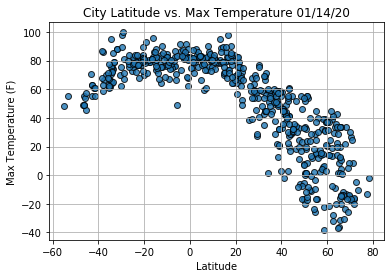

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

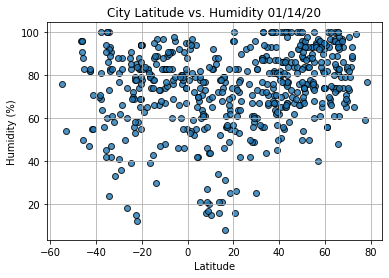

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


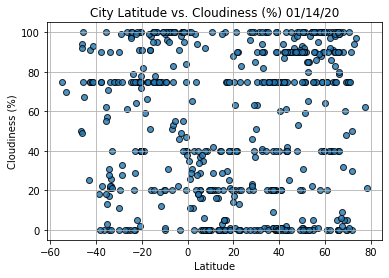

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

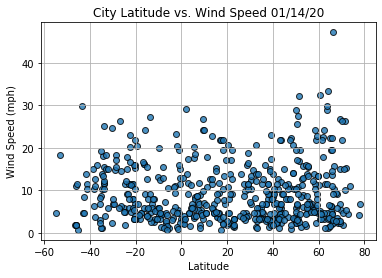

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err)=linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2020-01-14 16:56:58
Lat                        -34.42
Lng                         19.23
Max Temp                    70.56
Humidity                       92
Cloudiness                      0
Wind Speed                  18.01
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
549     True
550     True
551     True
552     True
553     True
Name: Lat, Length: 554, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Tambura,SS,2020-01-14 16:56:57,5.60,27.47,78.66,21,20,3.42
5,Thompson,CA,2020-01-14 16:56:57,55.74,-97.86,-16.60,75,90,5.82
12,Robertson,US,2020-01-14 16:56:57,36.52,-86.87,55.99,93,20,3.36
14,Norman Wells,CA,2020-01-14 16:56:58,65.28,-126.83,-36.40,73,5,3.36
18,Catuday,PH,2020-01-14 16:56:58,16.29,119.81,79.36,77,0,11.81
...,...,...,...,...,...,...,...,...,...
549,Salamiyah,SY,2020-01-14 16:58:02,35.01,37.05,48.56,67,0,6.87
550,Hongjiang,CN,2020-01-14 16:58:03,27.11,110.00,39.27,93,96,3.51
551,Winnipeg,CA,2020-01-14 16:55:08,49.88,-97.15,7.00,77,90,19.46
552,Freeport,US,2020-01-14 16:56:21,40.66,-73.58,45.00,70,1,10.29


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


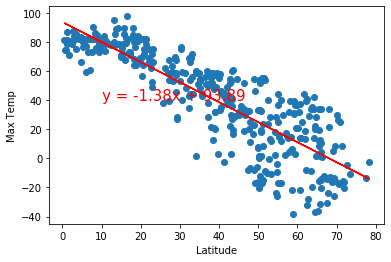

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(10,40))

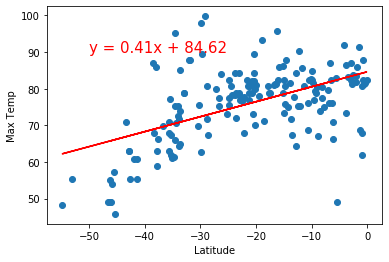

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50,90))

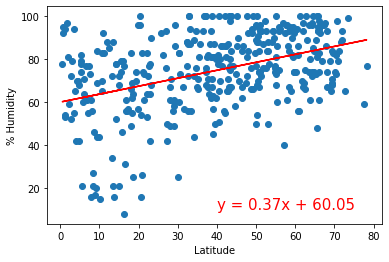

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',(40,10))

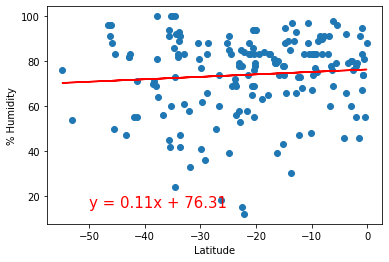

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',(-50,15))


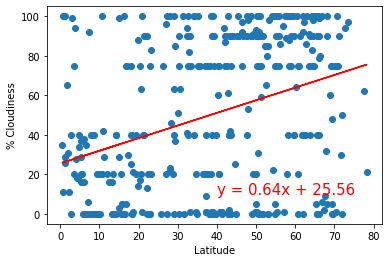

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(40,10))

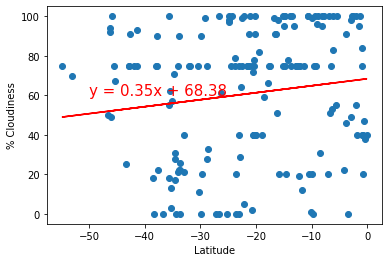

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))

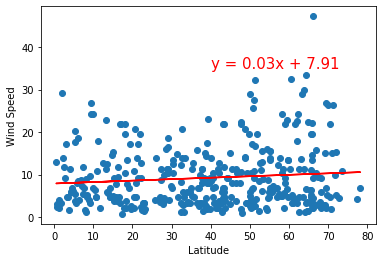

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(40,35))


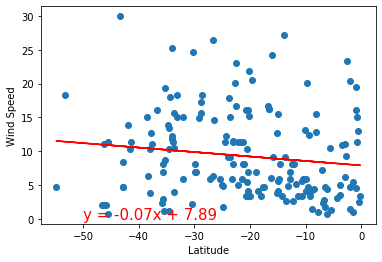

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(-50,0))